In [18]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

In [2]:
train_data = np.array(pd.read_csv('linear_data_train.csv'))
test_data = np.array(pd.read_csv('linear_data_test.csv'))

X_train = train_data[0:500, 0:2]
Y_train = train_data[0:500, 2]
X_test = test_data[:, 0:2]
Y_test = test_data[:, 2]


In [25]:
def fit(X_train,Y_train):
    lr = 0.01
    epochs = 8
    N = X_train.shape[0]

    m = np.random.rand(2, 1)
    b = np.random.rand(1, 1)

    x_0_range=np.arange(X_train[:,0].min(),X_train[:,0].max(),0.1)
    x_1_range=np.arange(X_train[:,1].min(),X_train[:,1].max(),0.1)

    Error = []
    for i in range(epochs):
        errors = []

        for n in range(N):

            y_pred = np.matmul(X_train[n:n+1],m)+b
            e= np.subtract(Y_train[n], y_pred)

            Y_pred = np.matmul(X_train, m) + b
            error = np.mean(np.abs(Y_train - Y_pred))
            errors.append(np.abs(e[0,0]))

            #update
            m = m + lr*X_train[n:n+1,:].T* e
            b = b + lr * e

            # plot data
            ax = plt.subplot(1, 2, 1, projection='3d')

            # ax.clear()
            x_0, x_1 = np.meshgrid(x_0_range, x_1_range)
            z = x_0 * m[0] + x_1 * m[1] + b
            ax.plot_surface(x_0, x_1, z, rstride=1, cstride=1, alpha=0.4)
            ax.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], Y_train[Y_train == 1], c='r', marker='o')
            ax.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], Y_train[Y_train == -1], c='g', marker='o')
            ax.set_xlabel('X0')
            ax.set_ylabel('X1')
            ax.set_zlabel('Y')

        # Plot Error
        print(errors)
        Error.append(np.mean(errors))
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title('Loss')
        x = np.arange(0, len(Error))
        ax2.plot(x, Error, marker='o')
#         plt.pause(0.01)
        # ax2.show()
    return m,b

def predict(X_test):
    y_pred=np.matmul(X_test,m)+b
    return y_pred

def evaluate(X,Y):
    y_pred = np.matmul(X, m) + b
    y_predic = np.zeros(len(y_pred))
    for i ,test in enumerate(X):
        y_predic[i]=predict(test)
    y_predic[np.where(y_predic<0)] =  -1
    y_predic[np.where(y_predic>0)] = 1
    accuracy = (y_predic == Y).sum() / len(Y)
    loss = np.mean(np.abs(np.subtract(Y, y_pred)))
    return loss, accuracy

[1.272361071767215, 0.13540153521739284, 0.3165518578015647, 1.2072481930209586, 0.3084288886272746, 0.32795223994188516, 0.3109038339987985, 0.22662995473941483, 0.3218000733350249, 1.1928924593510055, 0.18132274801424786, 0.14566118098586678, 0.26927214264512955, 0.4041860918175484, 1.2712450594338238, 0.475432030013901, 0.4620042989039961, 0.23682443869266445, 0.21003551637315432, 1.3116489438881658, 0.22511627444090232, 1.2537622560133865, 0.23823099753403776, 1.3754586000175917, 0.3469325159447526, 0.20919010001071303, 0.30270828998249033, 1.3100217699989498, 0.36678852659850747, 0.3482762885890667, 0.30156855171450925, 0.1649742987117957, 1.3314850444279775, 0.3153769100053355, 0.25591221940317277, 0.20366191460630878, 1.2925718058682132, 1.3405746820778461, 1.3119350942900263, 1.1652935108191964, 1.1978644090402395, 0.4215033087109368, 0.3084841826121516, 1.312098797187463, 1.3150654180734431, 0.4821949363063148, 0.39850777187357544, 0.29817440105720516, 1.053343991984326, 1.071

[0.6540880683438017, 0.2669946160034161, 0.5901440029060928, 0.5827089083656309, 0.5066326647896283, 0.589344722440554, 0.5711194910216426, 0.442539876434773, 0.5066613394592431, 0.5799915047727813, 0.31637879339328934, 0.2776225274590688, 0.46531568087617237, 0.6926912661751128, 0.7257344285129388, 0.7382431241925013, 0.7227191886908084, 0.4106272921134978, 0.3443800089098482, 0.8184786690180244, 0.3485158447749982, 0.6761389309589917, 0.39910551900255886, 1.01464368481389, 0.554093498734468, 0.33765384924000963, 0.42970167964207096, 0.857640262525585, 0.5300596389338778, 0.5459979986235972, 0.4563903707557774, 0.19536451270026156, 0.8263866221824929, 0.49601301853480884, 0.32863860950392065, 0.2683398320062189, 0.8122949979181424, 0.9255352300019165, 0.9213304744931894, 0.6363447178696651, 0.796694761292045, 0.4910888374498352, 0.3116101969029661, 0.9493766253431613, 0.9926213234007792, 0.6598864098596637, 0.416579173784117, 0.2858720377435904, 0.5274986544844682, 0.6273731985813712,

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.4333092330462014, 0.04794024034024502, 0.506914808779645, 0.34090195572657955, 0.37129534251807017, 0.5099956488551364, 0.4942670186175828, 0.32864227879218, 0.3836029047183933, 0.3269954961270094, 0.14844334321106156, 0.10969824013744112, 0.3625601342668501, 0.6763000614419712, 0.5165418782802847, 0.7135543905151699, 0.6991125292736885, 0.30665752527731227, 0.2131505908960748, 0.6385233411885769, 0.21596430460673732, 0.4245674535355082, 0.30102811437255184, 0.9302807257501513, 0.5040693928485734, 0.22262708424307098, 0.32441080726951577, 0.6902849405304816, 0.4609933281212544, 0.5047441564877951, 0.38359836317688134, 0.02502194145945802, 0.6096808905781407, 0.45137165780078803, 0.2037772351386279, 0.13800650148889193, 0.603262207013945, 0.7666181148001412, 0.7780309982416184, 0.3817776916698855, 0.6376632024740996, 0.38476762621923233, 0.15315272355499798, 0.8194262859135037, 0.8916839302196631, 0.6443445028007362, 0.28189369795419106, 0.12677439292769432, 0.256633389938149, 0.4169

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.2769699304761326, 0.1075721810607515, 0.44770467866305763, 0.16977793145963427, 0.27490304209317307, 0.4535337221663116, 0.4396384724474085, 0.2478619258859438, 0.2958143302638596, 0.14795564848346276, 0.02923144665990174, 0.009380745222452358, 0.28951942253979834, 0.6644185541820304, 0.36849581727888314, 0.6954810956012649, 0.6818484788651298, 0.23287318999716766, 0.11995222727425214, 0.5112189022429576, 0.12181629448762399, 0.2462213263853652, 0.23154423993256223, 0.8709774390834517, 0.46854891745116767, 0.14118219835250212, 0.2494836910696414, 0.571876723212544, 0.4117611489296875, 0.4754649499421657, 0.33193138914094966, 0.09587127897221492, 0.45587757084629354, 0.41981806270404776, 0.11505297733714337, 0.045566063026715176, 0.45510580105904397, 0.6540321438513077, 0.6766676233225613, 0.2013685096263793, 0.5254032653227703, 0.3089481044104174, 0.040500150385564204, 0.7274369295389327, 0.8203624487189956, 0.633326470503657, 0.18595655753537943, 0.013785863760267025, 0.06490000344

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.16609387281130206, 0.21773012537510827, 0.4057973630837477, 0.04855261719927939, 0.20640551770714133, 0.413560341260504, 0.40102187725311556, 0.19081541667193003, 0.23329962424819017, 0.021152640364618613, 0.05518029898645249, 0.09358179598281735, 0.23778464169553026, 0.6559588075022256, 0.2636128090143597, 0.6823286794639618, 0.6693072814127767, 0.1807084460919357, 0.05393901751418051, 0.42106185414324815, 0.055111954603845215, 0.11963276841338333, 0.18253074015275583, 0.8292487585638466, 0.44350131607967835, 0.08373529487493503, 0.1962826552277137, 0.48800779971299335, 0.3767799098140636, 0.45484981668419855, 0.2954177054363618, 0.18151985213710375, 0.34653878237264113, 0.39770275551526946, 0.052125439544743246, 0.019841590341921345, 0.3499765591676077, 0.5741565001533576, 0.6048928686562725, 0.07341072442953489, 0.4461545419972016, 0.2549227788741344, 0.03951167886776008, 0.6622290078679147, 0.7699011047567605, 0.6256508280416613, 0.11765225540985558, 0.06636216988755383, 0.07085

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.087448289118219, 0.29574108792696063, 0.37615253292437223, 0.03730485589929522, 0.15769108288866773, 0.38527295677014783, 0.37375043790434215, 0.15058229800075007, 0.18871614993022656, 0.06862681194259279, 0.11492758219141397, 0.1530693381596211, 0.20115126287250784, 0.6499268417306849, 0.18932378077609235, 0.6726826000422448, 0.6601300770665481, 0.1438623564295407, 0.007194296358763008, 0.35723321795195684, 0.007860293017044162, 0.029742545281725485, 0.14801584908399712, 0.7999620030820012, 0.42587102124143117, 0.04328527001520399, 0.15848755992218932, 0.4286194252692299, 0.3519053416046747, 0.44036932293564557, 0.26964022911260943, 0.24218658519114533, 0.2687361913671166, 0.3822650438894897, 0.007486600675177035, 0.06609238570702147, 0.2753537990469469, 0.5174719094795136, 0.5540886436376096, 0.017361723582951516, 0.3902894758057791, 0.21636166564430503, 0.09637684271670732, 0.6160057505448095, 0.7342219303279391, 0.6203376303733905, 0.06895200465937346, 0.12322727922471732, 0.166

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.031652791841425665, 0.3509677161879756, 0.3551970881404449, 0.09809473123158274, 0.12300877385087827, 0.36526700026926573, 0.35451597927596223, 0.12225710859929051, 0.156857813349786, 0.1321666310251155, 0.15719541603795628, 0.19504843570580532, 0.17522087842219225, 0.6456177167365551, 0.13671910003574506, 0.6655389687141642, 0.6533525546048609, 0.11786845172504345, 0.02589400087200011, 0.31206402474324846, 0.02560348630778808, 0.03412484485293277, 0.12376673705617636, 0.7794797303681202, 0.41349215796137617, 0.014869745748485874, 0.1316177374157801, 0.38658148075750676, 0.3341992365675339, 0.4302305983611201, 0.25146789107176093, 0.2851466533865177, 0.21330443092428197, 0.37154843779204083, 0.024186107611635865, 0.0987692714824957, 0.22236168515269217, 0.47723028895267605, 0.5181460938971898, 0.08177073418201886, 0.35098429632521744, 0.1887766349179345, 0.13682610704844556, 0.5832403018586121, 0.7090167591374203, 0.6166924371171421, 0.034163383986582474, 0.163584949800047, 0.234878

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.007942335849711268, 0.3900468085022102, 0.34039829343370465, 0.14111845427769643, 0.09828140463249957, 0.3511291686052096, 0.34097367776554344, 0.10236301918004043, 0.1340333756745844, 0.17711104643727693, 0.18707687856843513, 0.2246260784716294, 0.15687564718842428, 0.6425316172561393, 0.09948305553578785, 0.6601852645840294, 0.6482903461820249, 0.09956089501168242, 0.049304026445510685, 0.28011810582619556, 0.049294962457914426, 0.07953749277584299, 0.10678345622616803, 0.7652242275231274, 0.40482971968130443, 0.0050282713686227165, 0.11249669939083407, 0.3568397310960605, 0.3215785416263597, 0.4231630737294243, 0.2386814239307531, 0.3155571657625995, 0.1737455335442326, 0.36416667148180726, 0.0466658416959429, 0.12182958305635849, 0.18470802890308602, 0.44864787477539614, 0.49273497000756405, 0.12748793527900593, 0.32340261211519516, 0.16898541177744741, 0.16563119008822413, 0.5600147779226499, 0.6912318616858573, 0.6142233217747297, 0.009250371459484708, 0.19223833657433076, 0.2

/home/deep/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


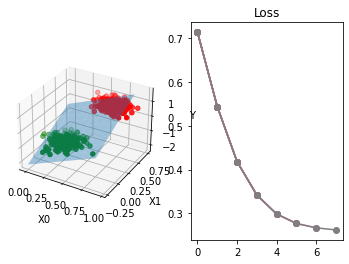

In [26]:
m,b = fit(X_train,Y_train)

In [22]:
y_pred=predict(X_test)
loss, accuracy = evaluate(X_test, Y_test)
print('error',loss, 'accuracy',accuracy)

error 1.0473943081732195 accuracy 1.0


In [23]:
loss, accuracy = evaluate(X_train, Y_train)
print('error',loss, 'accuracy',accuracy)


error 1.0510879750250346 accuracy 1.0
